
Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

Load the data

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
#check if there are null values
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
#check the distribution of the categorical data
print(df['Extracurricular Activities'].value_counts())

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


Encoding Categorical Data

In [ ]:
#Encode the Extracurricular Activities column

df.replace({'Extracurricular Activities' : {'No' : 0, 'Yes' : 1}}, inplace=True)

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Data Visualization

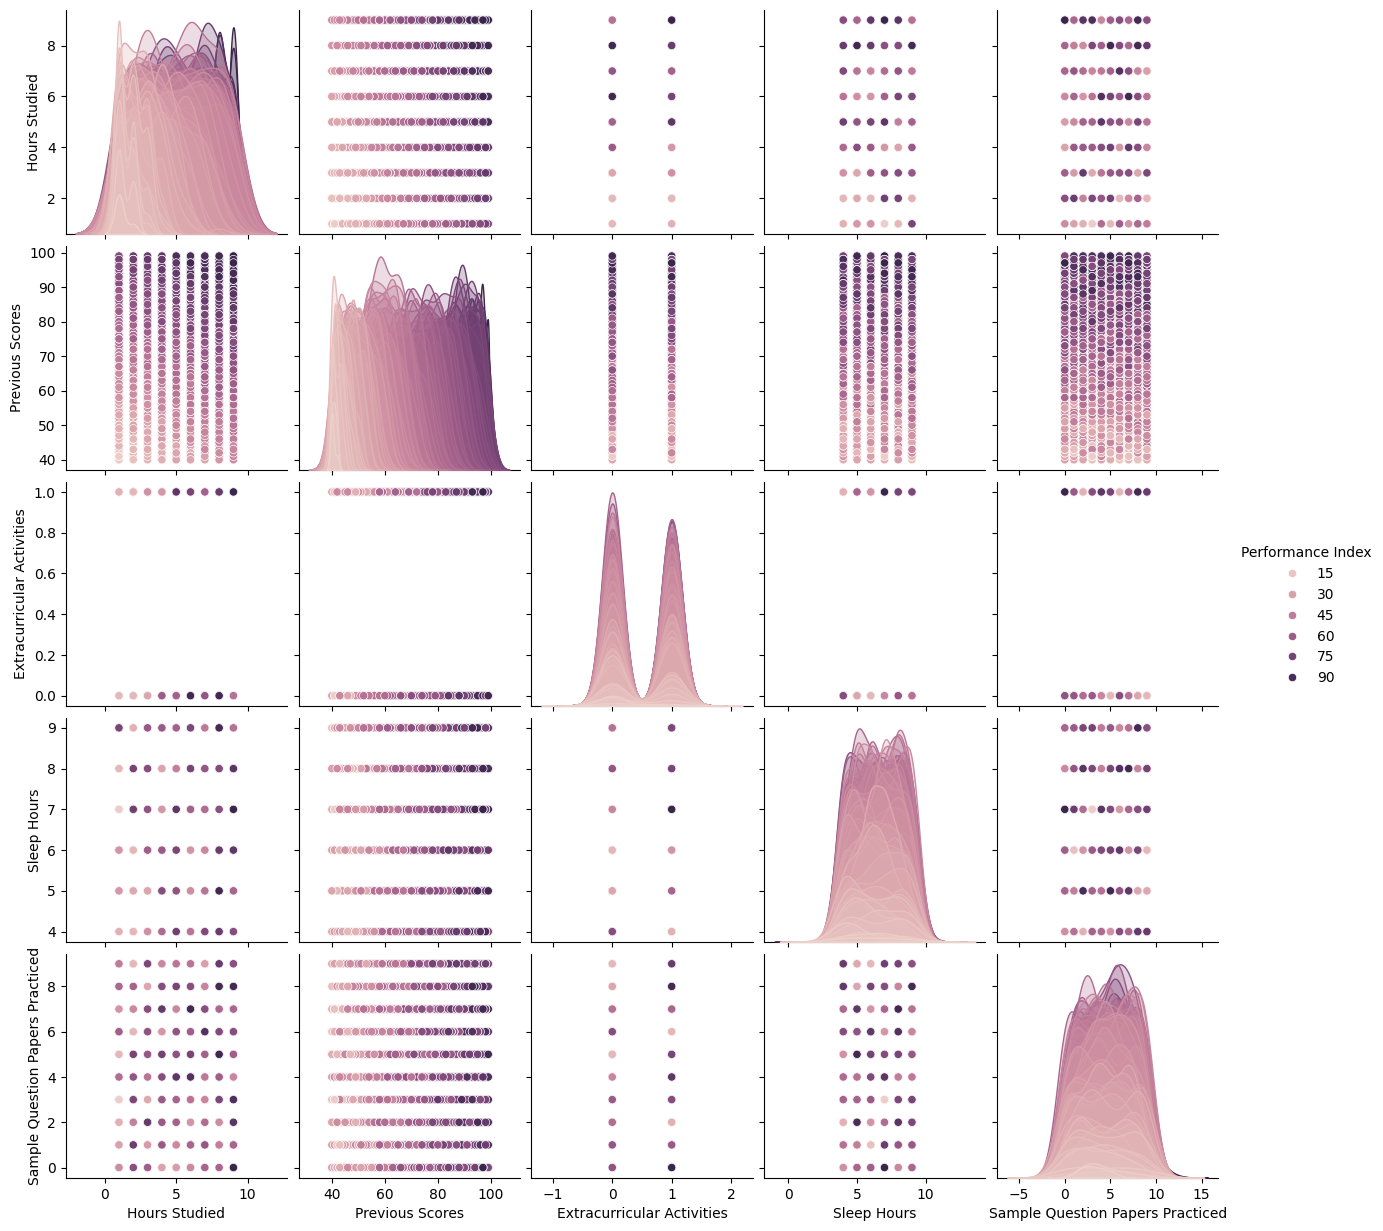

In [ ]:
#pairplot
sns.pairplot(df,hue ='Performance Index')
plt.show()

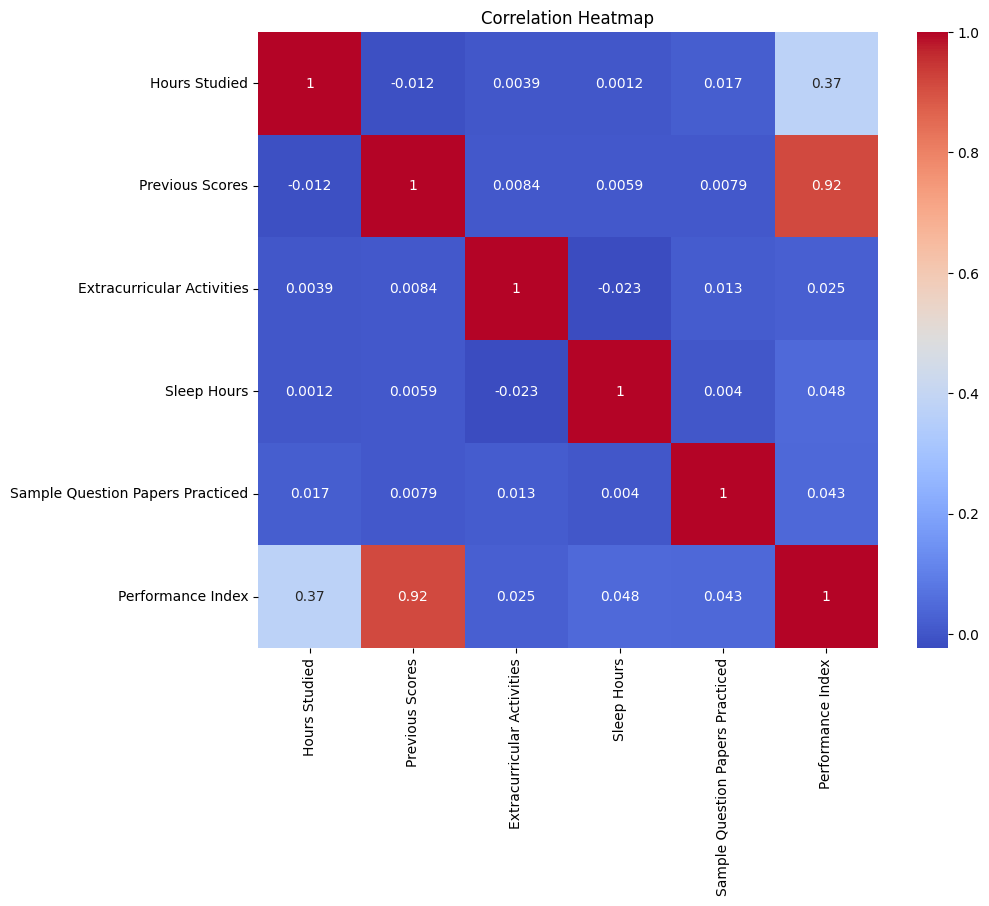

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

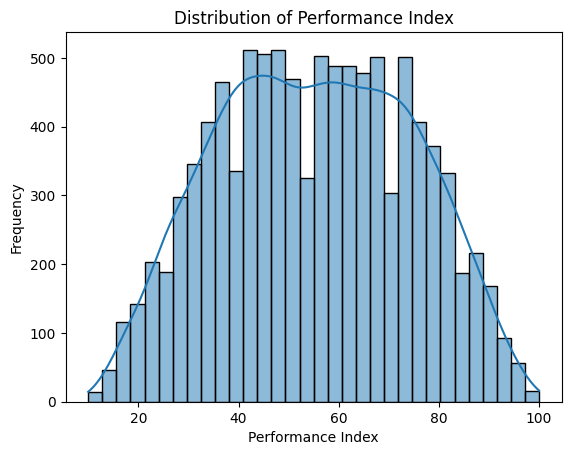

In [ ]:
# Distribution plot of the target variable
sns.histplot(df['Performance Index'], kde=True)
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

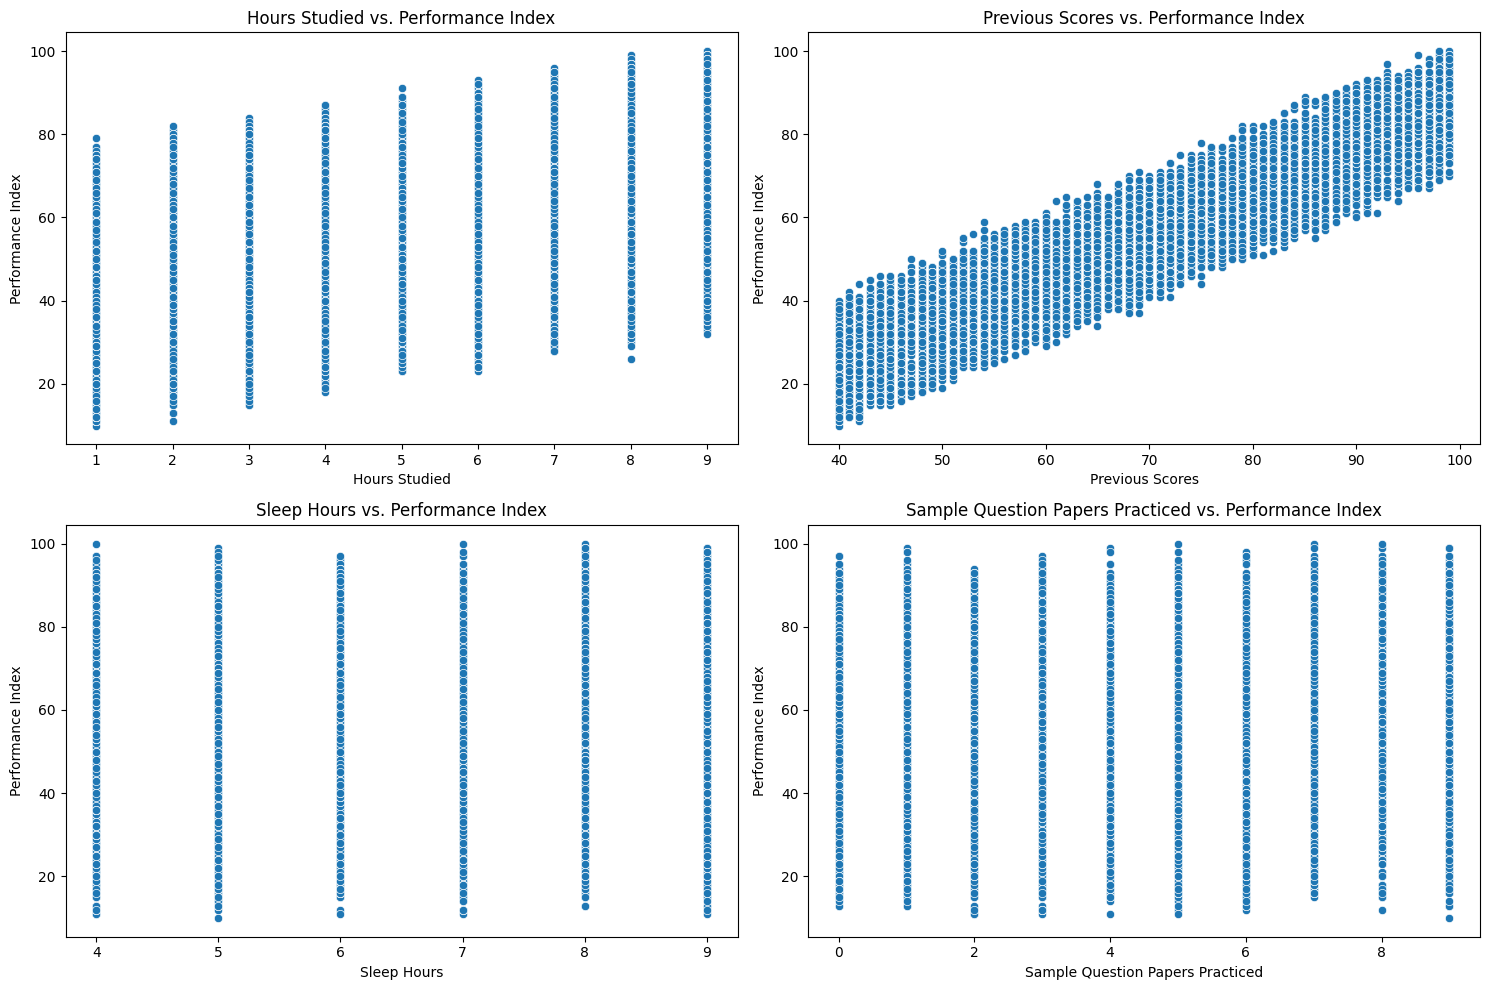

In [ ]:
# Scatter plots for each predictor vs. target variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hours Studied vs. Performance Index
sns.scatterplot(ax=axes[0, 0], x=df['Hours Studied'], y=df['Performance Index'])
axes[0, 0].set_title('Hours Studied vs. Performance Index')

# Previous Scores vs. Performance Index
sns.scatterplot(ax=axes[0, 1], x=df['Previous Scores'], y=df['Performance Index'])
axes[0, 1].set_title('Previous Scores vs. Performance Index')

# Sleep Hours vs. Performance Index
sns.scatterplot(ax=axes[1, 0], x=df['Sleep Hours'], y=df['Performance Index'])
axes[1, 0].set_title('Sleep Hours vs. Performance Index')

# Sample Question Papers Practiced vs. Performance Index
sns.scatterplot(ax=axes[1, 1], x=df['Sample Question Papers Practiced'], y=df['Performance Index'])
axes[1, 1].set_title('Sample Question Papers Practiced vs. Performance Index')

plt.tight_layout()
plt.show()

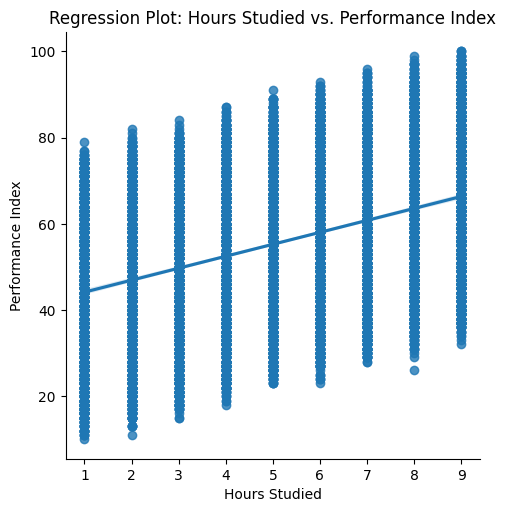

In [ ]:
# Regression plot
sns.lmplot(x='Hours Studied', y='Performance Index', data=df)
plt.title('Regression Plot: Hours Studied vs. Performance Index')
plt.show()

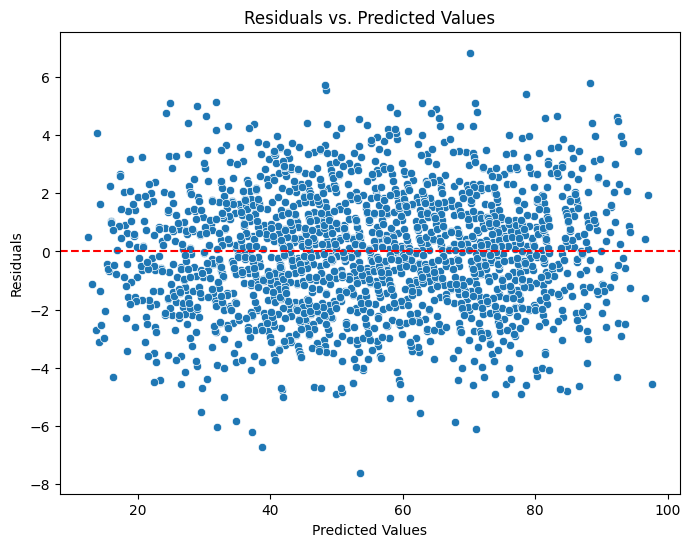

In [ ]:
# Residual plot
# Splitting the data into training and testing sets
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



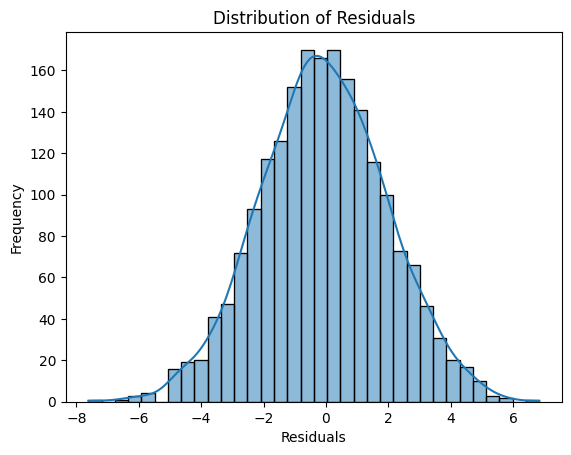

In [ ]:
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

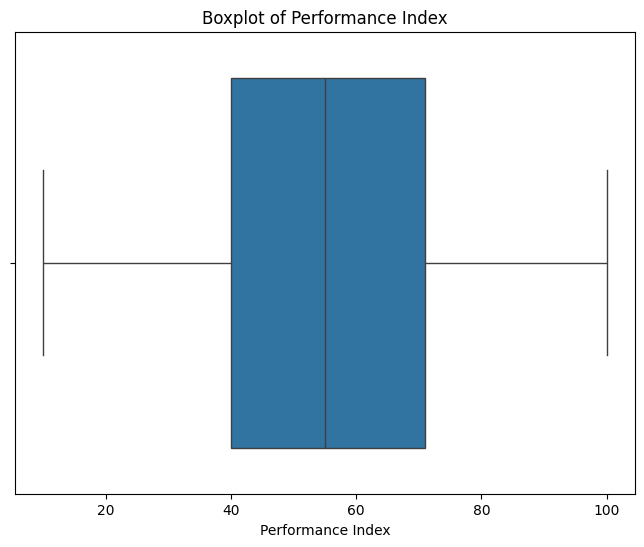

In [ ]:
# Boxplot of Performance Index
plt.figure(figsize=(8, 6))
sns.boxplot(x='Performance Index', data=df)
plt.title('Boxplot of Performance Index')
plt.show()

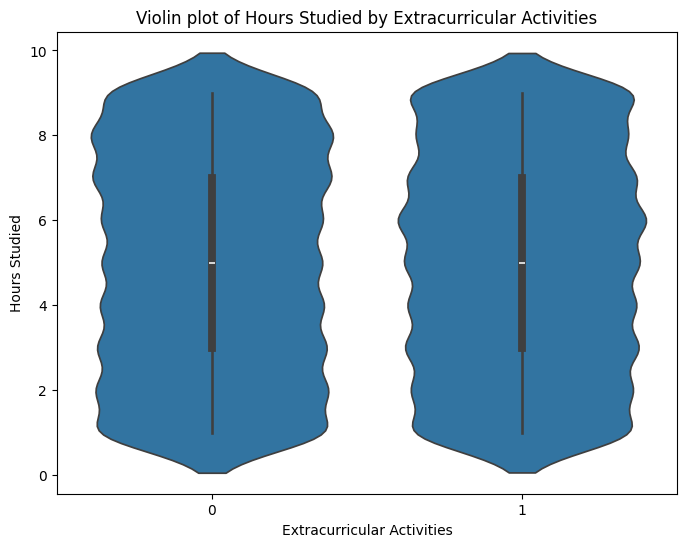

In [ ]:
# Violin plot of Hours Studied
plt.figure(figsize=(8, 6))
sns.violinplot(x='Extracurricular Activities', y='Hours Studied', data=df)
plt.title('Violin plot of Hours Studied by Extracurricular Activities')
plt.show()

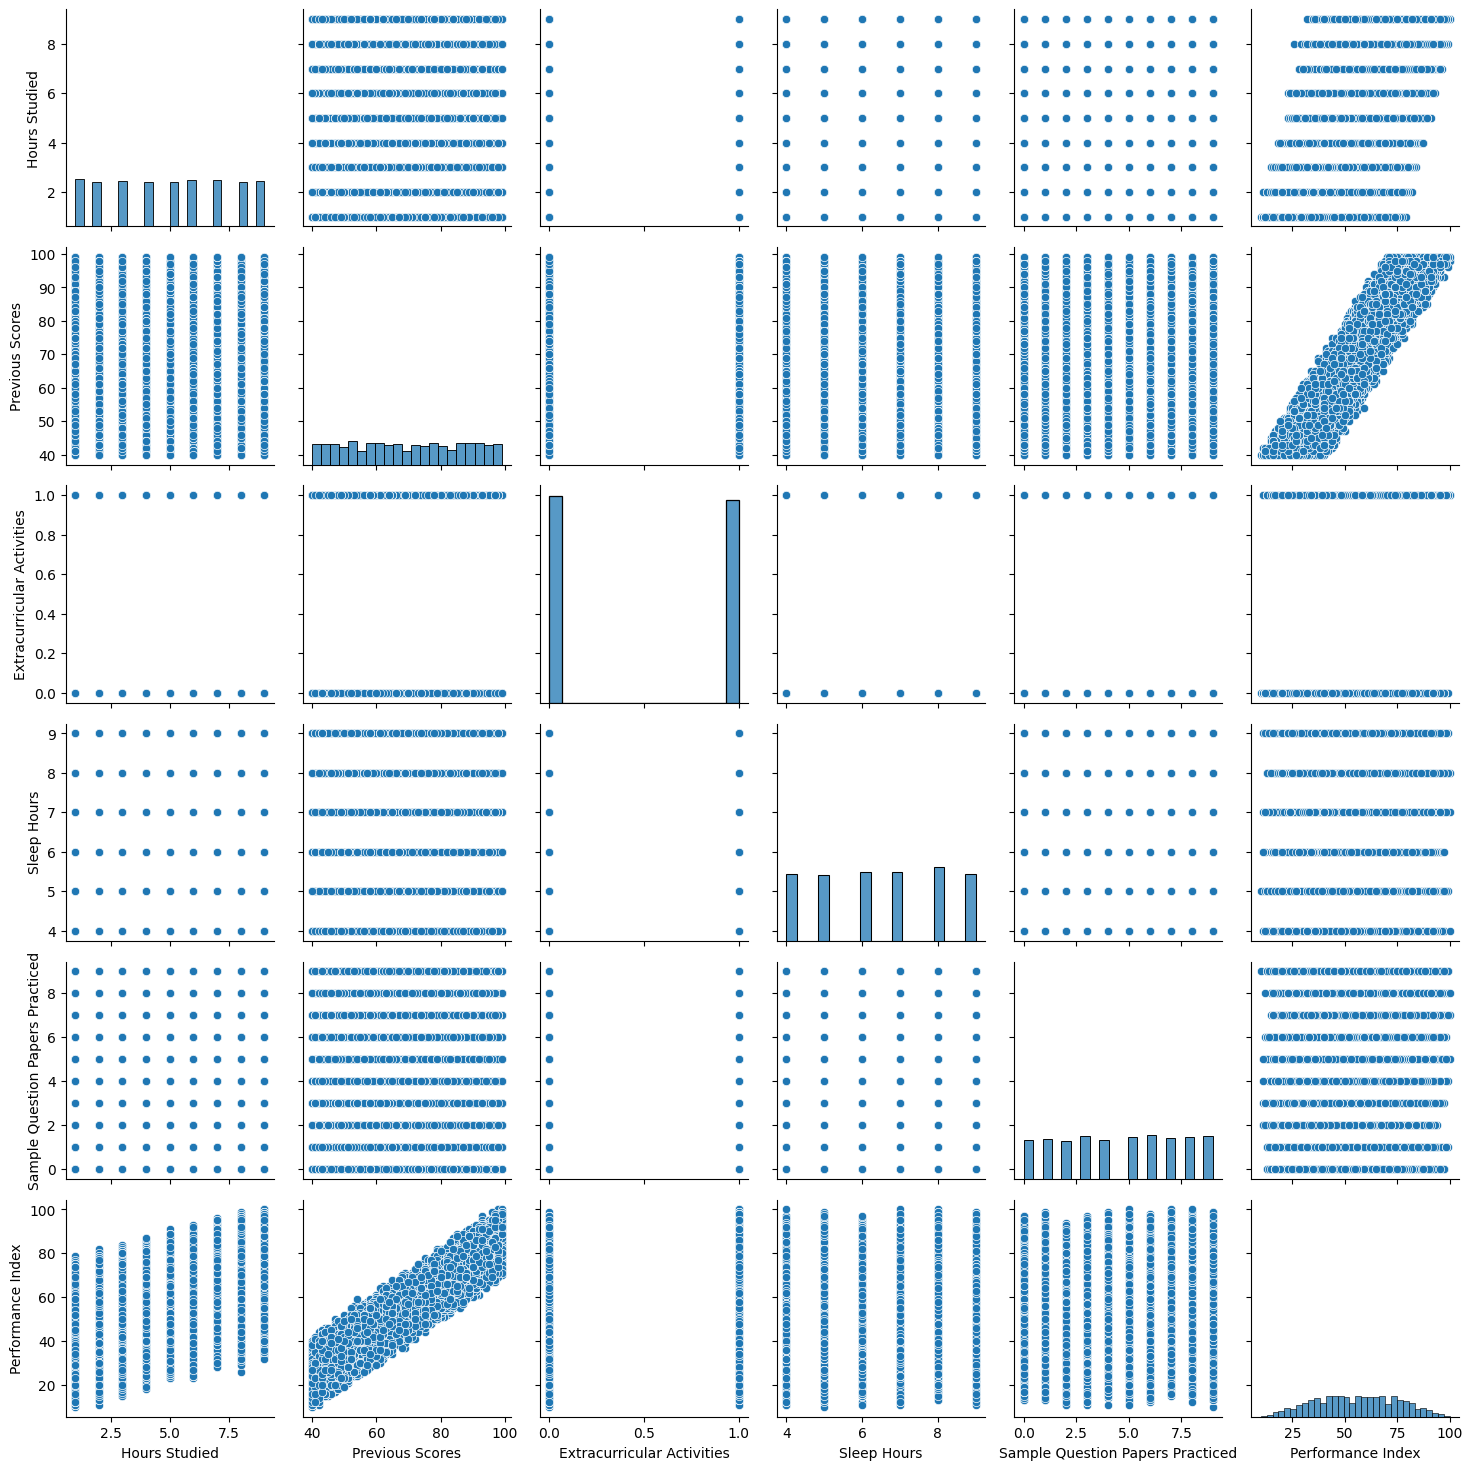

In [ ]:
# PairGrid for a more customizable pairplot
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

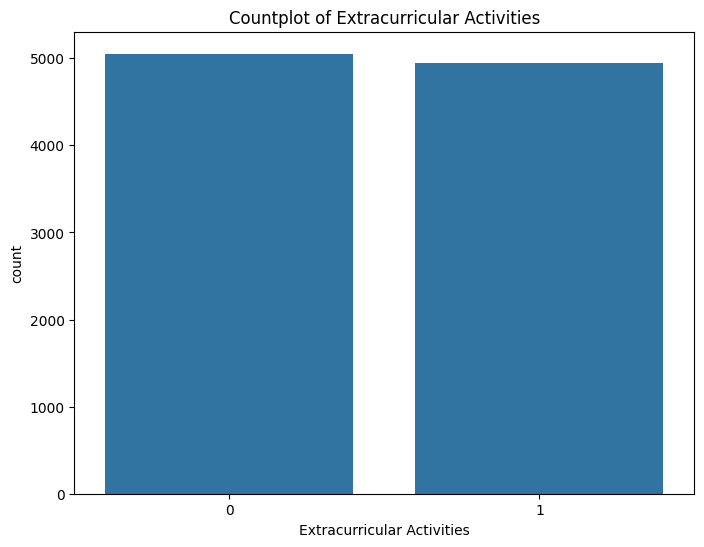

In [ ]:
# Countplot of Extracurricular Activities
plt.figure(figsize=(8, 6))
sns.countplot(x='Extracurricular Activities', data=df)
plt.title('Countplot of Extracurricular Activities')
plt.show()

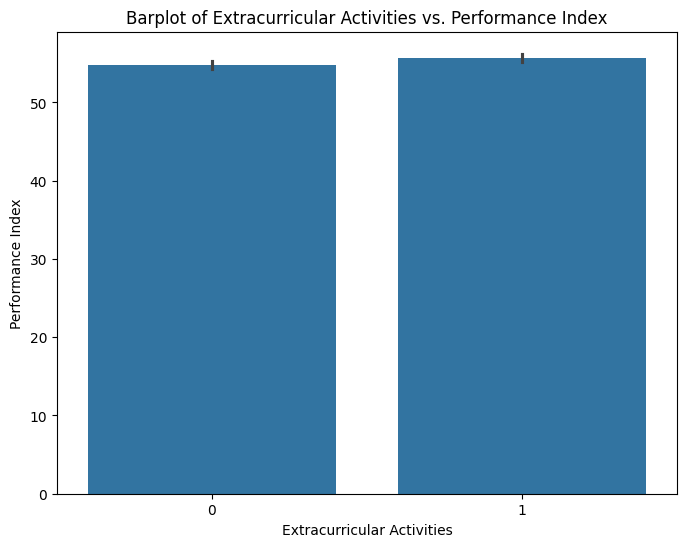

In [ ]:
# Barplot of Extracurricular Activities vs. Performance Index
plt.figure(figsize=(8, 6))
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Barplot of Extracurricular Activities vs. Performance Index')
plt.show()

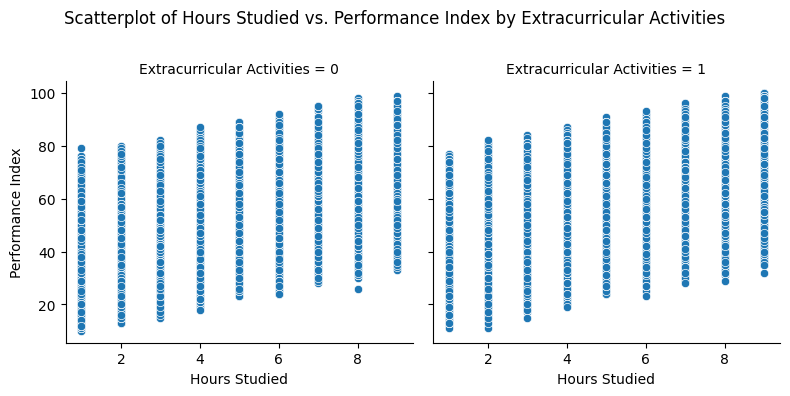

In [ ]:
# FacetGrid for visualizing Hours Studied vs. Performance Index based on Extracurricular Activities
g = sns.FacetGrid(df, col='Extracurricular Activities', height=4)
g.map(sns.scatterplot, 'Hours Studied', 'Performance Index')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Scatterplot of Hours Studied vs. Performance Index by Extracurricular Activities')
plt.show()

Pie Plot

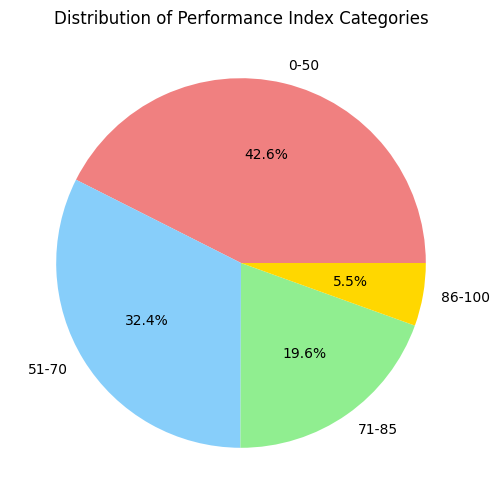

In [ ]:
# Define bins for performance index
bins = [0, 50, 70, 85, 100]
labels = ['0-50', '51-70', '71-85', '86-100']

# Create a new column with performance index categories
df['Performance Category'] = pd.cut(df['Performance Index'], bins=bins, labels=labels)

# Pie plot for the distribution of performance index categories
plt.figure(figsize=(8, 6))
df['Performance Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.title('Distribution of Performance Index Categories')
plt.ylabel('')
plt.show()


Split the data into dependent and independent variables

In [ ]:
X = df.drop(['Performance Index'], axis = 1)

Y = df['Performance Index']

In [ ]:
print(X)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample Question Paper

In [ ]:
print(Y)

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64


Split the data into testing and training

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

Model Training

In [ ]:
#loading our linear regression model
lin_reg_model = LinearRegression()


In [ ]:
#fit the train data into the regression model
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Make prediction using the model
training_data_prediction1 = lin_reg_model.predict(X_train)

In [ ]:
#R squared Error
error_value = metrics.r2_score(Y_train, training_data_prediction1)
print("R Squared Error = ", error_value)

R Squared Error =  0.9886611170188228


In [ ]:
#Make prediction on the test data
Y_pred = lin_reg_model.predict(X_test)

In [ ]:
#R squared Error on test data
error_value = metrics.r2_score(Y_test, Y_pred)
print("R Squared Error = ", error_value)

R Squared Error =  0.9890954655668953


Confusion Matrix:
 [[793  28   0   0]
 [ 16 589  43   0]
 [  0  12 402  20]
 [  0   0  11  86]]


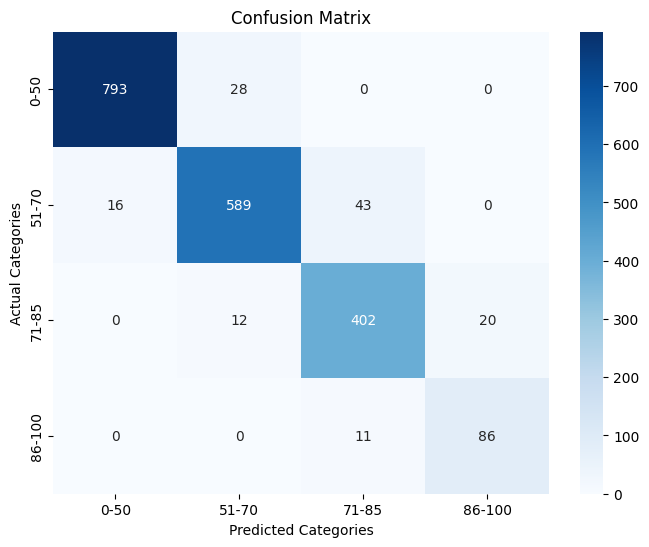

Classification Report:
               precision    recall  f1-score   support

        0-50       0.98      0.97      0.97       821
       51-70       0.94      0.91      0.92       648
       71-85       0.88      0.93      0.90       434
      86-100       0.81      0.89      0.85        97

    accuracy                           0.94      2000
   macro avg       0.90      0.92      0.91      2000
weighted avg       0.94      0.94      0.94      2000



In [ ]:
# Define bins and labels (same as for the performance index categories)
bins = [0, 50, 70, 85, 100]
labels = ['0-50', '51-70', '71-85', '86-100']

# Convert the actual and predicted values to categories
Y_test_binned = pd.cut(Y_test, bins=bins, labels=labels)
Y_pred_binned = pd.cut(Y_pred, bins=bins, labels=labels)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test_binned, Y_pred_binned, labels=labels)
print('Confusion Matrix:\n', conf_matrix)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Categories')
plt.ylabel('Actual Categories')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
class_report = classification_report(Y_test_binned, Y_pred_binned, labels=labels)
print('Classification Report:\n', class_report)
